In [1]:
import tensorflow as tf
import numpy as np

from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
#load data
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()


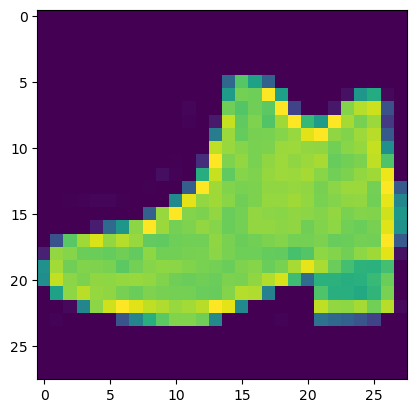

In [14]:
index=15   # Pick a random image to display

np.set_printoptions(linewidth=320)
#print(f'LABEL:{train_labels[index]}')
#print(f'\nIMAGE PIXEL ARRAY:\n{train_images[index]}')
#plt.imshow(train_images[index],cmap='Greys')  # show greyscales
plt.imshow(train_images[index])                # show color map

In [4]:
#Normalize Data
train_images=train_images/255.0
test_images=test_images/255.0

In [17]:
#Build model and train
model=keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])


inputs=np.array([[1.0,3.0, 4.0, 2.0]])  # create a random weigted probability input
inputs=tf.convert_to_tensor(inputs)  # convert it to a tensorflow object
print('inputs: ',inputs,'\n')        # show it's now a tensor
outputs=tf.keras.activations.softmax(inputs)  # Feed it into softmax just for visibility
sum=tf.reduce_sum(outputs)   
print('outputs: ',outputs)              # Output is now a tensor
print('sum:',sum)                       # Since it's softmax it sums to 1
prediction=np.argmax(outputs)           # Prediction is 2 because np.array[2] was the max value
print('prediction:',prediction,'\n\n')  # Prediction is 2 because np.array[2] was the max value

model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels, epochs=20)


inputs:  tf.Tensor([[1. 3. 4. 2.]], shape=(1, 4), dtype=float64) 

outputs:  tf.Tensor([[0.0320586  0.23688282 0.64391426 0.08714432]], shape=(1, 4), dtype=float64)
sum: tf.Tensor(0.9999999999999999, shape=(), dtype=float64)
prediction: 2 


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4877 - accuracy: 0.8277
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3670 - accuracy: 0.8661
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3276 - accuracy: 0.8783
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3046 - accuracy: 0.8869
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2857 - accuracy: 0.8936
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2711 - accuracy: 0.8992
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2563 - accuracy: 0.9033
Epoch 8/20
1875/1875 [======================

In [18]:
model.evaluate(test_images, test_labels) # See how we do against our validation set

313/313 [==============================] - 1s 1ms/step - loss: 0.3682 - accuracy: 0.8879


[0.36824512481689453, 0.8878999948501587]

In [23]:
classifications = model.predict(test_images)

print('output:',classifications[1])
print('prediction : ',np.argmax(classifications[1]))
print('first label: ',test_labels[1])


output: [9.8612183e-04 1.8263354e-17 9.9879372e-01 7.2957135e-13 1.9264079e-04 8.3062327e-16 2.7484830e-05 1.0343261e-13 2.6687704e-14 6.8082647e-18]
prediction :  2
first label:  2
